In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-blbdj4k1
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-blbdj4k1
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 515.4 kB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369498 sha256=faf2b4a95cb62bcb60826c003c87f2956647dd02c944ff5faf2f492ef0f35d1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-iyo2bkn0/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import torch
import clip
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt

In [ ]:
# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Define the target classes
target_classes = ["cat", "dog"]

# Load and preprocess the image

image_url = "https://lh4.googleusercontent.com/sL5lctmCOd0nCQcaHAm9bd1Gi3xsmQrgRP3HEgvWZwNcBPkBIAhbh4_e8torbhL_bLV3T80Sq_kj1GQ7kS7GhYR1E9ETPsYR5uaC1ZEqi0kuSRijl7mzF6TM9wAjRhiofuDwfxE4"
image_path = "test_image.png"
urllib.request.urlretrieve(image_url, image_path)
image = Image.open(image_path).convert("RGB")
image_input = preprocess(image).unsqueeze(0).to(device)

# Encode the image
with torch.no_grad():
    image_features = model.encode_image(image_input)

# Encode the target classes
text_inputs = clip.tokenize(target_classes).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_inputs)

# Compute the similarity scores
similarity_scores = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# Get the predicted class
_, predicted_class = similarity_scores.max(dim=-1)
predicted_class = predicted_class.item()

# Print the predicted class
predicted_label = target_classes[predicted_class]

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 103MiB/s]


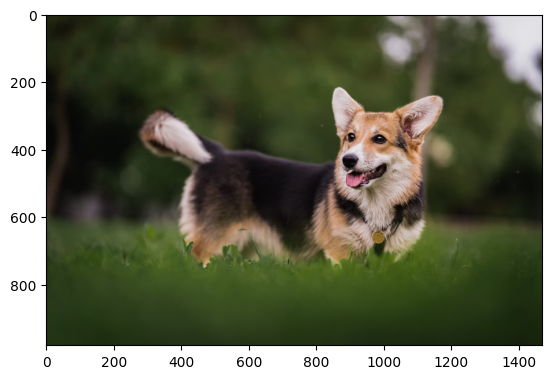

Predicted class: dog


In [ ]:
plt.imshow(image)
plt.show()
print(f"Predicted class: {predicted_label}")

In [ ]:
!pip install open_clip_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


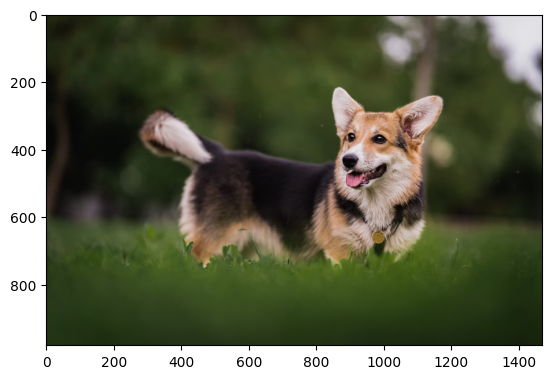

prob: a diagram 2.101487734762486e-05, a dog 0.9999570846557617, a cat 2.1905763787799515e-05


In [ ]:
import torch
from PIL import Image
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
tokenizer = open_clip.get_tokenizer('ViT-B-32')
image_url = "https://lh4.googleusercontent.com/sL5lctmCOd0nCQcaHAm9bd1Gi3xsmQrgRP3HEgvWZwNcBPkBIAhbh4_e8torbhL_bLV3T80Sq_kj1GQ7kS7GhYR1E9ETPsYR5uaC1ZEqi0kuSRijl7mzF6TM9wAjRhiofuDwfxE4"
image_path = "test_image.png"
urllib.request.urlretrieve(image_url, image_path)
image = Image.open(image_path).convert("RGB")
image = preprocess(image).unsqueeze(0)
text = tokenizer(["a diagram", "a dog", "a cat"])

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
plt.imshow(Image.open(image_path))
plt.show()

print(f"prob: a diagram {text_probs[0][0]}, a dog {text_probs[0][1]}, a cat {text_probs[0][2]}")